## Dry etching takeout

directionnality of the etch and anisotropy

make case with mask and case without to make them understand 

Fluorine chemistery, it is a basis chemistery for dry etching as it can be an inert gas but becomes a reactive gas when in a plasma
$CF_4 + 𝑒^- → CF_3^+ + F + 2𝑒^- $ and $CF_4 + 𝑒^- → CF_3 + F + 𝑒^- $


Isotropic etch of the Si: $Si(s) +4F(g) --> Si_3F_4(g)$
Polymeriation caused by the carbon in the $(CF2)$n-type polymer chains. polymer passivating
film, rather than etching

Inert gas like argon, ionized in the plasma but no etching from chemical reactions. However a voltage bias can modify the trajectory of the $Ar^+$ ions. 

# perfect isotropic etching

In [56]:
#select the case value
case = 1

None


In [38]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.animation import FuncAnimation
from IPython.display import display, HTML
import pandas as pd



Si_thickness = 1
resist_thickness = 0.1
y_lim = 1.5
x_lim = 4
fig, ax = plt.subplots(figsize=(12, 6))
y = np.linspace(0, 0.3, 30)

if case == 1:
# Set up the plot elements
    #silicon
    silicon = plt.Rectangle((0, 0), x_lim, Si_thickness, color='darkblue', label='Silicon')
    ax.add_patch(silicon)

    #resist on top the the silicon
    resist_1 = plt.Rectangle((0, Si_thickness), 1, resist_thickness, color='red', label='Mask')
    resist_2 = plt.Rectangle((1.5, Si_thickness), 1, resist_thickness, color='red')
    resist_3 = plt.Rectangle((3, Si_thickness), 1, resist_thickness, color='red')
    ax.add_patch(resist_1)
    ax.add_patch(resist_2)
    ax.add_patch(resist_3)
    #1st trench
    trench_1 = plt.Rectangle((1, Si_thickness), 0.5, 0, color='white')
    wedge_1_l = mpatches.Wedge((1.01, 1), 0.1, 180, 270,color='white', ec="none")
    wedge_1_r = mpatches.Wedge((1.5, 1), 0.1, 270, 0,color='white', ec="none")
    ax.add_patch(trench_1)
    ax.add_patch(wedge_1_l)
    ax.add_patch(wedge_1_r)
    #2nd trench
    trench_2 = plt.Rectangle((2.5, Si_thickness), 0.5, 0, color='white')
    wedge_2_l = mpatches.Wedge((2.5, 1), 0.1, 180, 270,color='white', ec="none")
    wedge_2_r = mpatches.Wedge((3, 1), 0.1, 270, 0,color='white', ec="none")
    ax.add_patch(trench_2)
    ax.add_patch(wedge_2_l)
    ax.add_patch(wedge_2_r)

else:
    x1 = [1,1,1.5,1.5]
    y1 = [1,1,1,1]
    x2 = [2.5,2.5,3,3]
    y2 = [1,1,1,1]

    silicon = plt.Rectangle((0, 0), x_lim, Si_thickness, color='darkblue', label='Silicon')
    resist_1 = plt.Rectangle((0, Si_thickness), 0.99, resist_thickness, color='red', label='mask')
    resist_2 = plt.Rectangle((1.5, Si_thickness), 1, resist_thickness, color='red')
    resist_3 = plt.Rectangle((3, Si_thickness), 1, resist_thickness, color='red')
    trench_1 = patches.Polygon(xy=list(zip(x1,y1)), fill=True,color = 'white')
    trench_2 = patches.Polygon(xy=list(zip(x2,y2)), fill=True,color = 'white')


    ax.add_patch(silicon)
    ax.add_patch(resist_1)
    ax.add_patch(resist_2)
    ax.add_patch(resist_3)
    ax.add_patch(trench_1)
    ax.add_patch(trench_2)

    
# Set up the axes and labels
ax.set_xlim(0, x_lim)
ax.set_ylim(0, y_lim)
ax.axhline(y= Si_thickness, color='gray', linestyle='--', linewidth=1, label='Original Si height')
ax.legend()

    # Add title to the plot
title = ax.set_title('Title')
title.set_position([.5, 1.1]) # Adjust position of the title
title.set_fontsize(10) # Adjust font size of the title

def update(frame):
    etching_depth = y[frame]
    underetch = etching_depth * underetch_coeff  # Calculate underetching based on etching_depth

    silicon_height = Si_thickness - etching_depth  # Calculate remaining silicon height
    
    if case == 1:
        trench_1.set_height(etching_depth)
        wedge_1_l.set_radius(etching_depth)
        wedge_1_r.set_radius(etching_depth)
        wedge_2_l.set_radius(etching_depth)
        wedge_2_r.set_radius(etching_depth)
        trench_2.set_height(etching_depth)
        trench_1.set_y(silicon_height)  # Adjust downward oxide layer position
        trench_2.set_y(silicon_height)  # Adjust downward oxide layer position

    elif case == 2:
        # Update the trapezoid vertices
        x1 = [1, 1+ underetch, 1.5-underetch, 1.5 ]
        y1 = [1,silicon_height,silicon_height,1] 
        x2 = [2.5, 2.5+underetch, 3- underetch, 3 ]
        y2 = [1,silicon_height,silicon_height,1] 
        # Update the trapezoids
        trench_1.set_xy(list(zip(x1, y1)))
        trench_2.set_xy(list(zip(x2, y2)))
    elif case ==3:
            # Update the trapezoid vertices
        x1 = [1-underetch, 1, 1.5, 1.5 + underetch]
        y1 = [1,silicon_height,silicon_height,1] 
        x2 = [2.5-underetch, 2.5, 3, 3 + underetch]
        y2 = [1,silicon_height,silicon_height,1] 
        # Update the trapezoids
        trench_1.set_xy(list(zip(x1, y1)))
        trench_2.set_xy(list(zip(x2, y2)))

    ax.set_ylim(0,y_lim)

ani = FuncAnimation(fig, update, frames=len(y), interval=100, repeat=False)

plt.close()
# Display the animation in JupyterLab
html_code = ani.to_jshtml()
centered_html = f'<div style="display: flex; justify-content: center;">{html_code}</div>'
display(HTML(centered_html))

### Note about the plot
* Keep in mind that this is a simple illustration to understand the anisotropy of dry etching processes. If the underetch coefficient is too large the above structure will bend and eventually collapse.

## Data analysis of an etching process

 Etching is a very empirical science as it depends on the etched material but also includes plasma physics. As such most of the process are mainly studied empirically. The etching parameters will influence many parameters on the surface:
* __Etch rate__ of each of the etched elements (be careful to consider both the etched and mask material which don't evolve at the same rate and result in the selectivity of the process. You want it to be in the right range to well control the depth of etch. If the etch rate is too fast you will loose precision, if it is too slow then it can be a limiting step in your process.
* The __selectivity__ which is the ratio of the etch rate of your under layer/mask etch rate. It allows to transfer deep pattern in structures. It is a commonly used in many standard processes like the Bosch process which take advantage of it.
* The __polymerization point__, when you reach it the etching process doesn't etch anymore but end up only depositing polymer on the surface. It is a critical point because when you are close to it you can achieve very high selectivity but keep in mind it might also result in some residual polimerization on your surface. Once you pass that point you are only going to deposit polymers on your surface.
* __Roughness__ of the surface. The more you augment the bias and the more you augment the ICP power will lead to a high directionnality and speed of ion. This will result in a strong physical etch and a poor roughness due to the bombardment of ions.
* __Directionnality__ is controlable with the bias power. It accelerate the ions and lead to a greater directionnality of the flux. Thus low bias might lead to some underetch.

__In the following exercice you will do a data analysis of etching data. Some of the data is missing and you need it for your process. With the help of python you will study the data you have and generate new data to find the missing data for your process. This exercice is very common in any data driven project where you will only have part of the data accessible or some missing/corrupted data.__

__Context:__ You are studing the etching of an SiO2 with a photoresist mask on top of it. A shape has been patterned in the photoresist and you want to transfer this shape to the SiO2. The mask covers the area where you want to have the SiO2 to be unaffected and is opened where you want to reduce the thickness of SiO2. 
To perform this etching you are using the [SPTS Advanced Plasma System (APS)](https://www.epfl.ch/research/facilities/cmi/equipment/etching/spts-aps/) module which is an ICP-based high density plasma source. This system was optimized for etching dielectrics (e.g. SiO2, SixNy, SiC, Al2O3, glass types…) which are usually difficult to etch using conventional RIE or ICP sources.
etching of SiO2 with PR mask.

_Keep in mind that any change in the parameters (etched material, mask material, machine or process used) will result in different result. However the impact of the coefficient with one another and on the process will be the same, just the values will change._



## 1st step: data download and cleaning

### Data download and first visualization

Your first task is to download the dataset stored in a csv file `etch_data.csv`. It contains different data about the etching process. Have a first visualization of it

In [42]:
import pandas as pd

data = pd.read_csv("etch_data.csv")

A common first step is to check the columns of the dataframe you can use the `df.head()`to see the top of it and the `df.tail()` to see the end. 

In [2]:
data.head()


,Pressure [mT],ICP [W],Bias [W],Selectivity,SiO2 etch rate,Resulting Ra
0,1.0,950,50,1.60,3.51,2.19
1,5.0,950,20,2.22,2.18,0.98
2,5.0,950,18,3.45,1.96,0.57
3,5.0,950,15,4.00,1.73,0.43
4,5.0,950,12,12.00,1.25,0.15


If you want to access to the data in a column you can acces it this way `df['column_name']`. Here is a link to other [basic operations for dataframe](https://www.studytonight.com/pandas/basic-operations-on-pandas-dataframe) if you are interested. Now you can directly apply operations on this dataframe of on a subset of it (column, row, single element). Common operations are `mean()`, `std()`, `sum()`, `max()`... you can find more [advanced operations](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) there especially in the _summarize data, handling missing data and subset operation/variable_ sections which contains the functions you will use after.
<br>
For instance now try to find the mean, max and minimum values of the ICP power.

In [3]:
data['Pressure [mT]']

0     1.0
1     5.0
2     5.0
3     5.0
4     5.0
5     5.0
6     5.0
7     5.0
8     3.5
9     2.5
10    1.0
11    5.0
12    5.0
13    5.0
14    4.0
15    1.0
16    2.0
17    3.0
18    4.0
19    5.0
20    6.0
21    7.0
22    5.0
23    5.0
24    6.0
25    4.0
26    5.0
27    6.0
28    7.0
29    5.0
30    5.0
31    6.0
Name: Pressure [mT], dtype: float64

These basic operations will be at the heart of all of the more complex operations you will do with pandas.

In [ ]:
import numpy as np

# Introduce missing values
data.at[1, 'Selectivity'] = np.nan
data.at[3, 'SiO2 etch rate'] = np.nan
data.at[6, 'Resulting Ra'] = np.nan

# Introduce errors
data.at[2, 'Pressure [mT]'] = -5
data.at[2, 'ICP [W]'] = 700
data.at[8, 'Bias [W]'] = 110

## Pre-processing of the data
 
This will be a standard procedure in all of your future work with any database. In you cases you are looking for any `NaN` values (generaly missing data or wrong type which lead to an error in the saved file). Concerning the rest of your data consider the range of values or the values your data shouldn't have. Corrupted data can ruin your data analysis if you forget to consider them.

In [4]:
# Check for NaN values in the data
print("Number of NaN values in the dataset:")
print(data.isna().sum())

# Check for aberrations in Pressure, ICP Power, and Bias columns
print("\nPressure column aberrations:")
print(data[data['Pressure [mT]'] < 0])

print("\nICP Power column aberrations:")
print(data[data['ICP [W]'] < 0])

print("\nBias column aberrations:")
print(data[(data['Bias [W]'] < 0) | (data['Bias [W]'] > 100)])

Number of NaN values in the dataset:
Pressure [mT]     0
ICP [W]           0
Bias [W]          0
Selectivity       0
SiO2 etch rate    0
Resulting Ra      0
dtype: int64

Pressure column aberrations:
Empty DataFrame
Columns: [Pressure [mT], ICP [W], Bias [W], Selectivity, SiO2 etch rate, Resulting Ra]
Index: []

ICP Power column aberrations:
Empty DataFrame
Columns: [Pressure [mT], ICP [W], Bias [W], Selectivity, SiO2 etch rate, Resulting Ra]
Index: []

Bias column aberrations:
Empty DataFrame
Columns: [Pressure [mT], ICP [W], Bias [W], Selectivity, SiO2 etch rate, Resulting Ra]
Index: []


Now that you have seen how to do basic manipulations of the dataframe drop the columns which contains any NaN or aberation

In [5]:
# Code to remove any row where the value of selected_column isn't in the range
min_value = 5
max_value = 10
column = 'Pressure [mT]'
df = data[(data[column] >= min_value) & (data[column] <= max_value)]
df

,Pressure [mT],ICP [W],Bias [W],Selectivity,SiO2 etch rate,Resulting Ra
1,5.0,950,20,2.22,2.18,0.98
2,5.0,950,18,3.45,1.96,0.57
3,5.0,950,15,4.00,1.73,0.43
4,5.0,950,12,12.00,1.25,0.15
5,5.0,950,10,0.00,1.12,0.12
6,5.0,950,9,0.00,1.08,0.11
7,5.0,950,5,0.00,0.66,0.04
11,5.0,950,20,2.22,2.18,1.50
12,5.0,950,18,3.45,1.96,1.20
13,5.0,950,15,4.00,1.73,1.00


Now eliminate all of the aberation and NaN values which contaminate your data

__By now your data should be clean and ready to be analysed__

## Step 2 data analysis of the parameters

In this section you will use your different techniques to analyse your current data. Your goal is to understand the effect of the different parameters of the dry etch to select the one you need for your needs.
<br> 
Regression and interpolation will be your best tools in these task. First visualize the different interaction of each one parameters with one another. Some visualization technique might not give the prediction but allow to visualize maximum value or minimum value regions easily (`nearest method`).

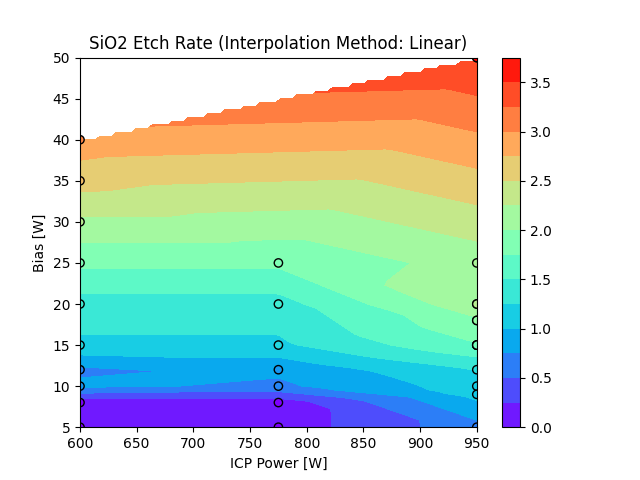

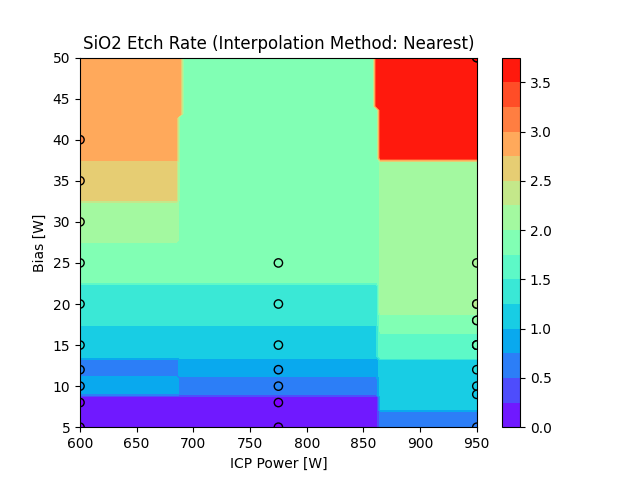

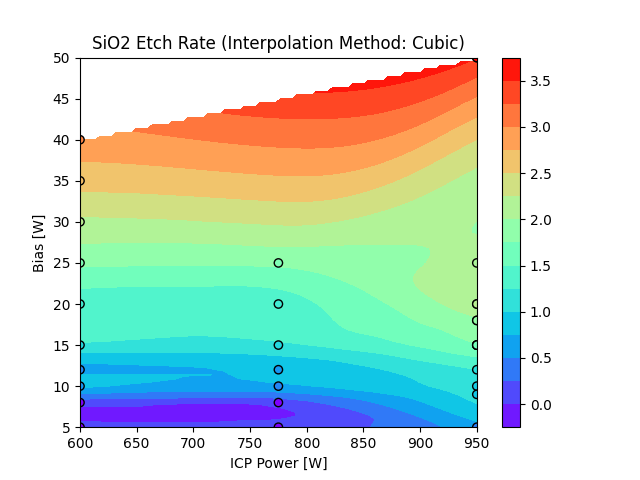

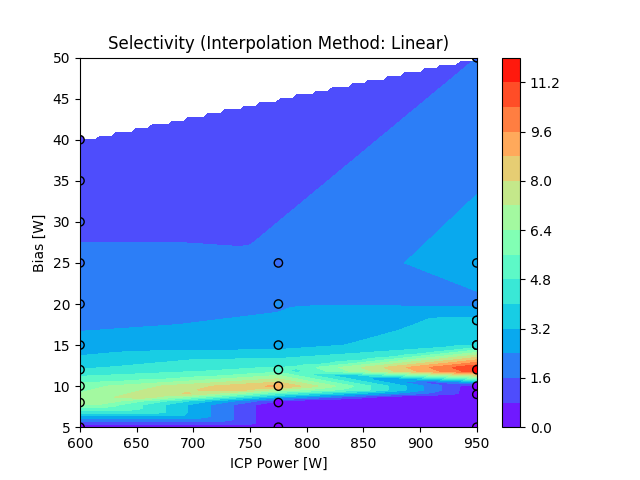

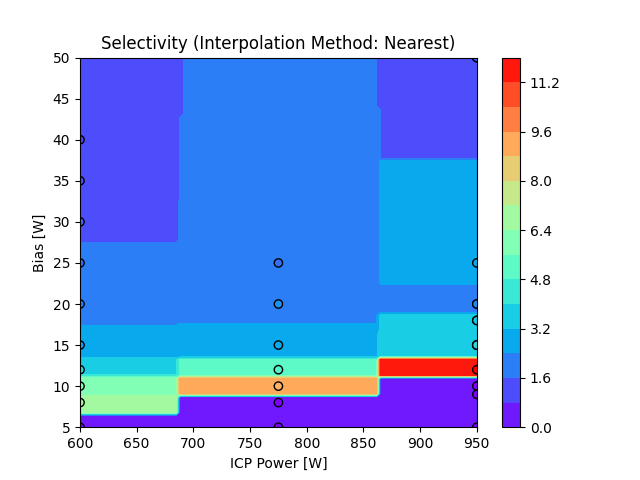

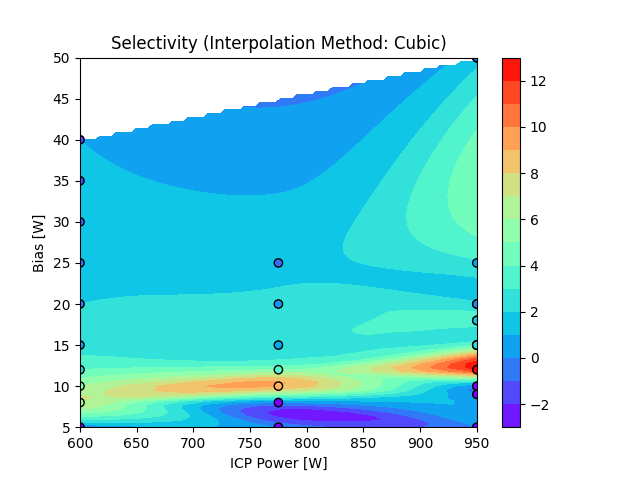

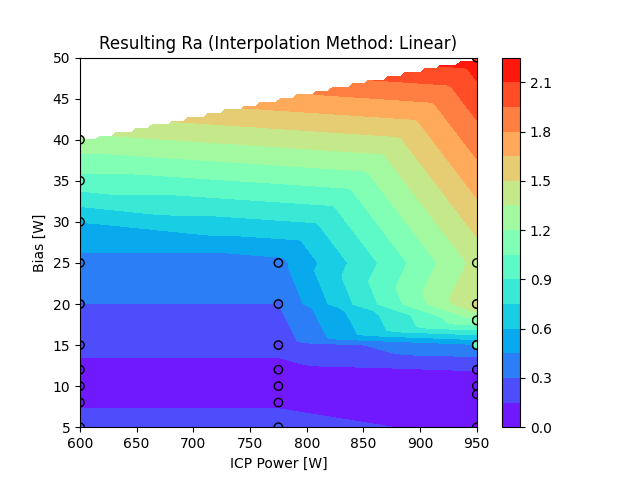

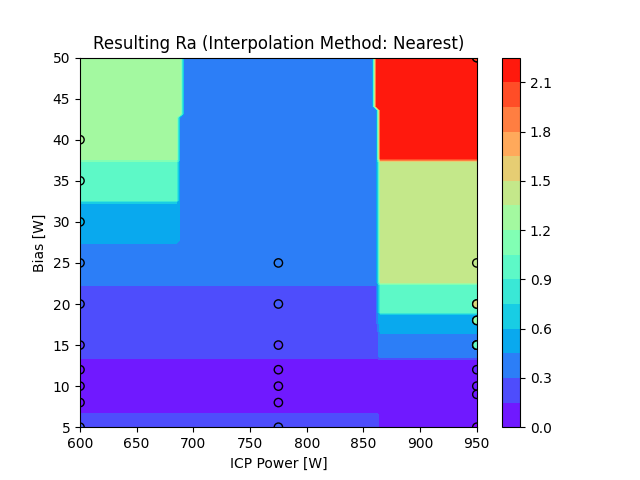

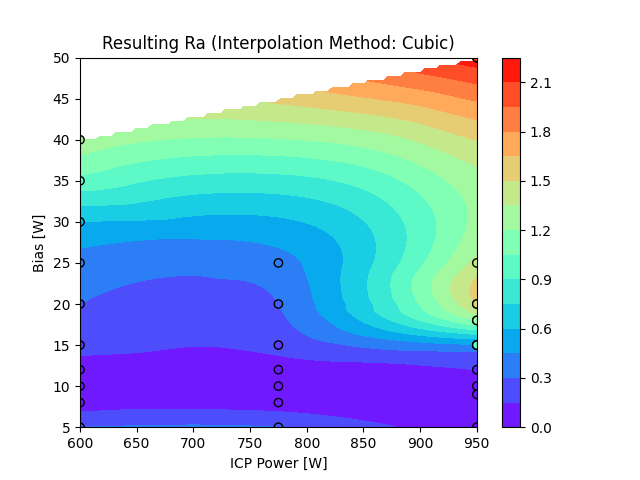

In [44]:
%matplotlib widget

import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# Function to plot a heatmap using different interpolation methods
def plot_heatmap(x, y, z, title, method):
    xi = np.linspace(x.min(), x.max(), 100)
    yi = np.linspace(y.min(), y.max(), 100)
    zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method=method)
    
    plt.figure()
    plt.contourf(xi, yi, zi, 15, cmap=plt.cm.rainbow)
    plt.colorbar()
    plt.scatter(x, y, c=z, cmap=plt.cm.rainbow, edgecolors='k')
    plt.xlabel('ICP Power [W]')
    plt.ylabel('Bias [W]')
    plt.title(f'{title} (Interpolation Method: {method.capitalize()})')
    plt.show()

# Remove rows with NaN values before plotting
plot_data = data.dropna()

x = plot_data['ICP [W]']
y = plot_data['Bias [W]']

# Plot heatmaps for SiO2 etch rate with different interpolation methods
z1 = plot_data['SiO2 etch rate']
for method in ['linear', 'nearest', 'cubic']:
    plot_heatmap(x, y, z1, 'SiO2 Etch Rate', method)

# Plot heatmaps for Selectivity with different interpolation methods
z2 = plot_data['Selectivity']
for method in ['linear', 'nearest', 'cubic']:
    plot_heatmap(x, y, z2, 'Selectivity', method)

# Plot heatmaps for Resulting Ra with different interpolation methods
z3 = plot_data['Resulting Ra']
for method in ['linear', 'nearest', 'cubic']:
    plot_heatmap(x, y, z3, 'Resulting Ra', method)


Now that you have studied the data you have found which parameters are important to determine the different output of the etching process. This will allow us to perform regression to find which value to choose for our parameters.

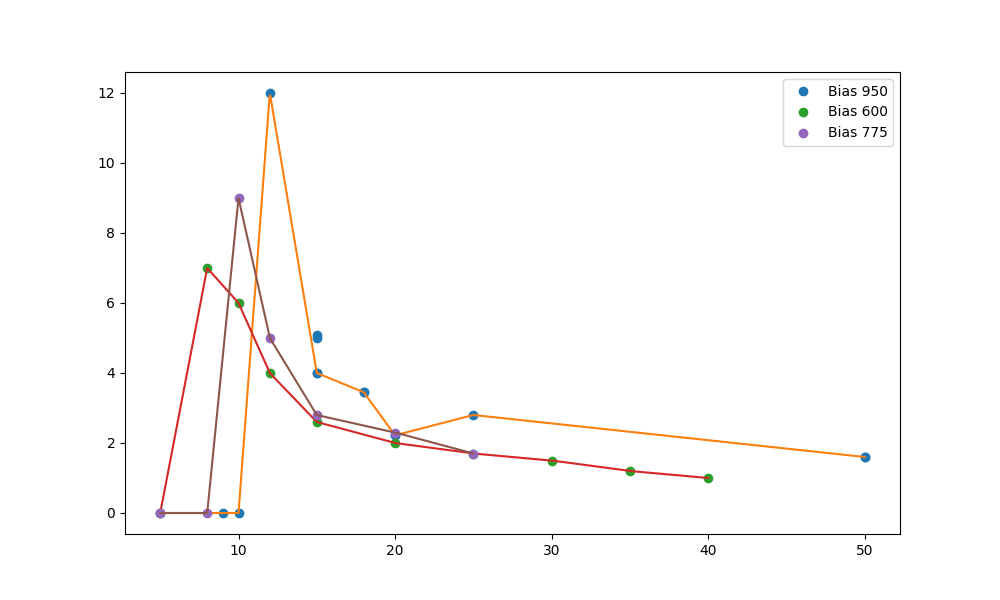

In [45]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Assuming data is your DataFrame and it has a 'Bias' column
biases = data['ICP [W]'].unique()

plt.figure(figsize=(10, 6))

for bias in biases:
    # Extract the data for this bias
    subset = data[data['ICP [W]'] == bias]
    
    # If there are less than 4 points, we skip this bias
    if len(subset) < 4:
        continue

    # Original data points
    x_ = subset['Bias [W]']
    y_ = subset['Selectivity']

    # Interpolation function
    f = interp1d(x_, y_)

    # Interpolated x values
    xnew = np.linspace(x_.min(), x_.max(), num=1000, endpoint=True)
    
    # Plot original points
    plt.plot(x_, y_, 'o', label=f'Bias {bias}')
    
    # Plot interpolation
    plt.plot(xnew, f(xnew), '-')
    
plt.legend()
plt.show()


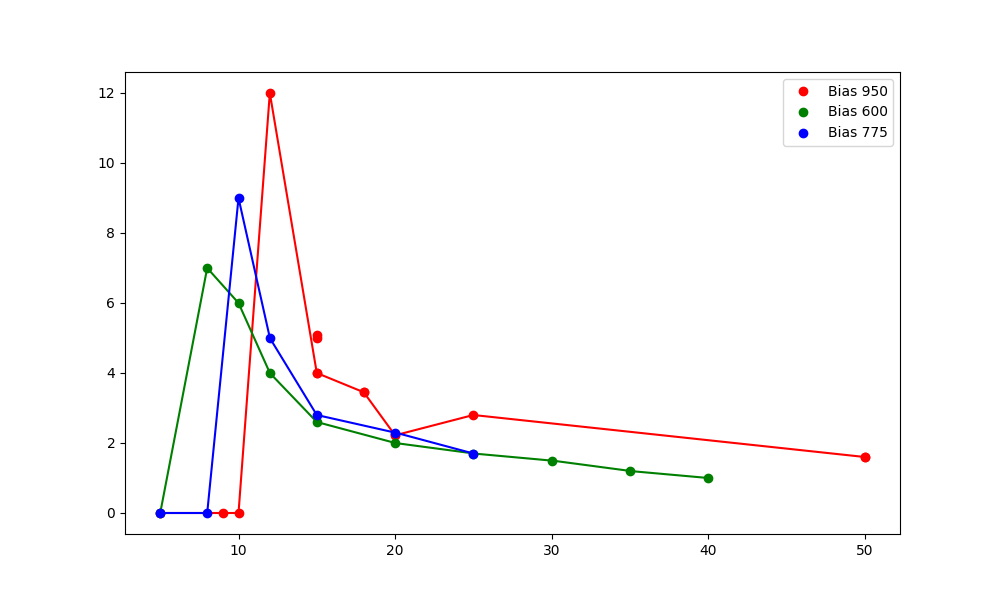

In [49]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from matplotlib import cm

# Assuming data is your DataFrame and it has a 'Bias' column
biases = data['ICP [W]'].unique()

# Create a colormap for the different bias groups
colors = ['red', 'green', 'blue']

plt.figure(figsize=(10, 6))

for bias, color in zip(biases, colors):
    # Extract the data for this bias
    subset = data[data['ICP [W]'] == bias]
    
    # If there are less than 4 points, we skip this bias
    if len(subset) < 4:
        continue

    # Original data points
    x_ = subset['Bias [W]']
    y_ = subset['Selectivity']

    # Check if selectivity is zero and x_ is below a certain value
    x_val = 10  # replace this with your specific x value
    if np.all(y_ == 0) and np.all(x_ < x_val):
        plt.axvspan(x_.min(), x_.max(), color='grey', alpha=0.5)
        continue
    
    # Interpolation function
    f = interp1d(x_, y_)

    # Interpolated x values
    xnew = np.linspace(x_.min(), x_.max(), num=1000, endpoint=True)
    
    # Plot original points
    plt.plot(x_, y_, 'o', color=color, label=f'Bias {bias}')
    
    # Plot interpolation
    plt.plot(xnew, f(xnew), color=color)
    
plt.legend()
plt.show()
